In [1]:
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
%matplotlib inline

### 加载数据集

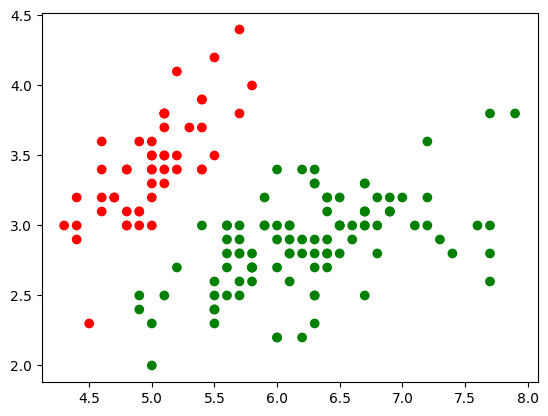

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
Y = np.where(Y == 0, 0, 1)
colors = np.where(Y == 0, 'r', 'g')

plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.show()

### 打乱数据集

In [3]:
np.random.seed(233)
np.random.shuffle(X)
np.random.shuffle(Y)

In [4]:
m = X.shape[0]
n = X.shape[1]
m, n

(150, 4)

### 从数据集中分批获取mini_batch
> 这一步也可以是从mysql等地方分批读取

In [5]:
def data_iter(batch_size, features, labels):
    global m
    for i in range(0, m, batch_size):
        end_index = i + batch_size
        if end_index > m:
            end_index = m
        yield torch.tensor(features[i:end_index,:], dtype=torch.float32), torch.tensor(labels[i:end_index], dtype=torch.float32)

In [6]:
batch_size = 30

In [7]:
for mini_X, mini_Y in data_iter(batch_size, X, Y):
    print(mini_X, '\n', mini_Y)
    break

tensor([[5.2000, 2.7000, 3.9000, 1.4000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [4.9000, 3.1000, 1.5000, 0.2000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [5.6000, 3.0000, 4.1000, 1.3000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [6.2000, 2.8000, 4.8000, 1

### 初始化W, B

In [8]:
W = torch.normal(0, 0.01, size=(1, n), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
W, b

(tensor([[ 0.0012, -0.0023, -0.0015, -0.0036]], requires_grad=True),
 tensor([0.], requires_grad=True))

### 定义超参数

In [9]:
lr = 0.02
epochs = 20

### 定义损失函数

In [10]:
def squared_loss(y_hat, y):
    return torch.sum((y_hat.reshape(y.shape) - y) ** 2 / 2)

In [11]:
def binary_crossentropy(y_hat, y):
    n = y.shape[0]
    y_hat = y_hat.reshape(y.shape)
    loss = - (y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)) / n
    return loss.sum()

### sigmoid

In [12]:
def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

### 优化算法 更新参数

In [13]:
def sgd():
    global W, b, lr, batch_size

    with torch.no_grad():
        # 更新参数时不更新梯度, 所以是no_grad
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_()
        b.grad.zero_()

### 定义模型

In [14]:
def lpr(x):
    global W, b
    z = torch.matmul(W, x.T) + b
    return sigmoid(z)

### 训练模型

In [15]:
history = []
for epoch in range(epochs):
    for x, y in data_iter(batch_size, X, Y):
        loss = binary_crossentropy(lpr(x), y)
        loss.backward()
        sgd()
        print(f"\r epoch {epoch} loss = {loss}", end='')
        history.append(loss.detach().numpy())
    print("")

 epoch 0 loss = 0.6216214299201965
 epoch 1 loss = 0.6103989481925964
 epoch 2 loss = 0.6069528460502625
 epoch 3 loss = 0.6045498847961426
 epoch 4 loss = 0.6024398803710938
 epoch 5 loss = 0.6004881858825684
 epoch 6 loss = 0.5986617207527161
 epoch 7 loss = 0.5969474315643319
 epoch 8 loss = 0.5953367352485657
 epoch 9 loss = 0.5938224196434021
 epoch 10 loss = 0.5923976898193359
 epoch 11 loss = 0.5910565853118896
 epoch 12 loss = 0.5897936224937439
 epoch 13 loss = 0.5886036157608032
 epoch 14 loss = 0.5874817967414856
 epoch 15 loss = 0.5864236950874329
 epoch 16 loss = 0.5854254364967346
 epoch 17 loss = 0.5844830870628357
 epoch 18 loss = 0.5835931301116943
 epoch 19 loss = 0.5827524662017822


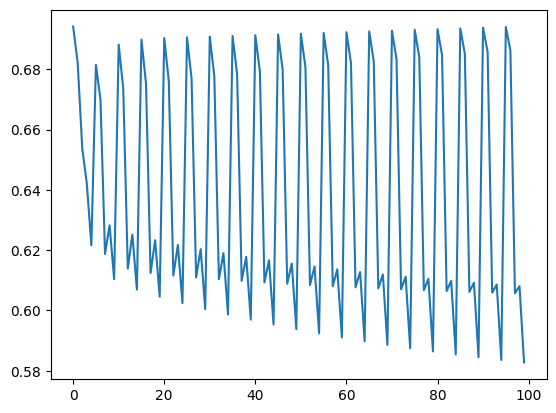

In [16]:
plt.plot(np.arange(len(history)), history)
plt.show()

In [17]:
Y_hat = lpr(torch.tensor(X, dtype=torch.float32))
Y_hat

tensor([[0.6537, 0.6779, 0.6735, 0.6800, 0.6845, 0.6469, 0.6682, 0.7147, 0.6730,
         0.6681, 0.6697, 0.6897, 0.6472, 0.6634, 0.6907, 0.6782, 0.6860, 0.6745,
         0.6720, 0.6975, 0.6680, 0.6761, 0.6907, 0.6678, 0.6817, 0.6833, 0.6949,
         0.6639, 0.6543, 0.6674, 0.6808, 0.6835, 0.6750, 0.6369, 0.6597, 0.7088,
         0.6611, 0.6466, 0.6787, 0.6837, 0.6665, 0.6923, 0.6674, 0.6727, 0.6848,
         0.6701, 0.7000, 0.6631, 0.7047, 0.6777, 0.7262, 0.6535, 0.6603, 0.6624,
         0.6710, 0.6902, 0.6807, 0.6963, 0.6832, 0.6683, 0.7109, 0.6940, 0.6813,
         0.6867, 0.6937, 0.6590, 0.6569, 0.6991, 0.6845, 0.6530, 0.6770, 0.6933,
         0.6885, 0.6642, 0.7032, 0.6659, 0.6348, 0.6546, 0.6820, 0.6815, 0.6766,
         0.7298, 0.6821, 0.6874, 0.6749, 0.6654, 0.6977, 0.6855, 0.6561, 0.6631,
         0.6856, 0.6643, 0.6748, 0.6783, 0.6695, 0.6584, 0.6532, 0.7001, 0.6677,
         0.6723, 0.7068, 0.6988, 0.6847, 0.6993, 0.6856, 0.6707, 0.6736, 0.6629,
         0.6547, 0.6808, 0.6

In [18]:
W, b

(tensor([[ 0.0979,  0.1098, -0.0460, -0.0119]], requires_grad=True),
 tensor([0.0258], requires_grad=True))

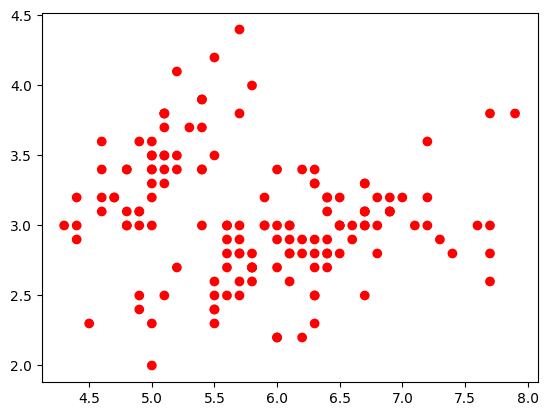

In [19]:
colors = np.where(Y_hat[0] > 0.5, 'r', 'g')
plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.show()